# Proyek NLP 
Muhammad Fakhri Rahman

muhammad17031@mail.unpad.ac.id



## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import string
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords

## **Hyperparameter Setting**

In [2]:
vocab_size = 7500
embedding_size = 64
trunc_type = 'post'
padding_type = 'post'
max_length = 100
oov_token = '<OOV>'

## **Data Preparation**


In [3]:
df1 = pd.read_csv('/content/inshort_news_data-1.csv')
df2 = pd.read_csv('/content/inshort_news_data-2.csv')
df3 = pd.read_csv('/content/inshort_news_data-3.csv')
df4 = pd.read_csv('/content/inshort_news_data-4.csv')
df5 = pd.read_csv('/content/inshort_news_data-5.csv')
df6 = pd.read_csv('/content/inshort_news_data-6.csv')
df7 = pd.read_csv('/content/inshort_news_data-7.csv')

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
df.columns.str.match('Unnamed')
df.loc[:,~df.columns.str.match('Unnamed')]
df = df.drop('Unnamed: 0',axis=1)
df = df.drop(columns=['news_headline'])
df

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology
...,...,...
12115,Two Indian Air Force doctors who have speciali...,science
12116,NASA's Juno space probe has discovered an FM s...,science
12117,University of Konstanz's researchers have unco...,science
12118,Renowned astrophysicist Professor Shashikumar ...,science


### Exploratory data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

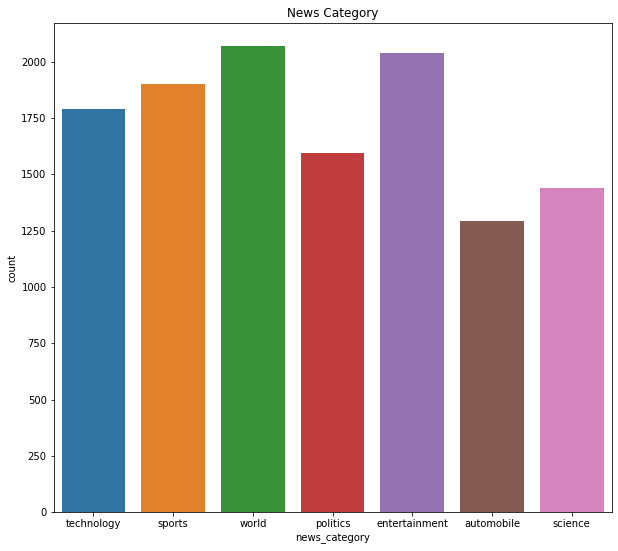

In [5]:
plt.figure(figsize=(10,9))
sns.countplot(df['news_category'])
plt.title('News Category')
plt.show

### One-hot Encoding

In [6]:
category = pd.get_dummies(df.news_category)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='news_category')
new_df

,news_article,automobile,entertainment,politics,science,sports,technology,world
0,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
12115,Two Indian Air Force doctors who have speciali...,0,0,0,1,0,0,0
12116,NASA's Juno space probe has discovered an FM s...,0,0,0,1,0,0,0
12117,University of Konstanz's researchers have unco...,0,0,0,1,0,0,0
12118,Renowned astrophysicist Professor Shashikumar ...,0,0,0,1,0,0,0


### Data Cleaning

In [7]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [8]:
def tokenization(text):
    tokens = re.split('\s|(?<!\d)[,.]|[,.](?!\d)',text)
    return tokens

In [9]:
nltk.download('stopwords')
stopwords = stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
new_df['news_article'] = new_df['news_article'].apply(lambda x: remove_punctuation(x))
new_df['news_article'] = new_df['news_article'].apply(lambda x: x.lower())
new_df['stopwrds_removed_article'] = new_df['news_article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
new_df

,news_article,automobile,entertainment,politics,science,sports,technology,world,stopwrds_removed_article
0,deepminds ai system alphafold has been recogni...,0,0,0,0,0,1,0,deepminds ai system alphafold recognised solut...
1,microsoft teams will stop working on internet ...,0,0,0,0,0,1,0,microsoft teams stop working internet explorer...
2,china in response to reports of us adding chin...,0,0,0,0,0,1,0,china response reports us adding chinese chipm...
3,the global smartphone sales in the third quart...,0,0,0,0,0,1,0,global smartphone sales third quarter 2020 fel...
4,the european union eu is hoping that us presid...,0,0,0,0,0,1,0,european union eu hoping us presidentelect joe...
...,...,...,...,...,...,...,...,...,...
12115,two indian air force doctors who have speciali...,0,0,0,1,0,0,0,two indian air force doctors specialised aeros...
12116,nasas juno space probe has discovered an fm si...,0,0,0,1,0,0,0,nasas juno space probe discovered fm signal em...
12117,university of konstanzs researchers have uncov...,0,0,0,1,0,0,0,university konstanzs researchers uncovered new...
12118,renowned astrophysicist professor shashikumar ...,0,0,0,1,0,0,0,renowned astrophysicist professor shashikumar ...


In [11]:
text = new_df['stopwrds_removed_article'].values
labels = new_df[['automobile', 'entertainment', 'politics', 'science', 'sports', 'technology', 'world']]
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size = 0.2)
print('Terdapat {} text untuk training'.format(len(text_train)))
print('Terdapat {} text untuk testing'.format(len(text_test)))

Terdapat 9696 text untuk training
Terdapat 2424 text untuk testing


In [12]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(text_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'added': 3,
 'also': 7,
 'australia': 16,
 'covid19': 10,
 'film': 18,
 'first': 6,
 'government': 19,
 'india': 4,
 'minister': 20,
 'new': 8,
 'one': 15,
 'people': 9,
 'president': 14,
 'said': 2,
 'tesla': 13,
 'test': 12,
 'two': 17,
 'us': 5,
 'year': 11}

In [13]:
train_sequences = tokenizer.texts_to_sequences(text_train)

train_padded = pad_sequences(train_sequences, maxlen = max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

41
100
35
100
36
100


In [14]:
validation_sequences = tokenizer.texts_to_sequences(text_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences[0]))
print(len(validation_padded[0]))

print(len(validation_sequences[1]))
print(len(validation_padded[1]))

print(len(validation_sequences[10]))
print(len(validation_padded[10]))

40
100
35
100
38
100


## **Training**

### Model

In [15]:
model = Sequential([
                    layers.Embedding(vocab_size, embedding_size),
                    layers.Bidirectional(layers.LSTM(embedding_size)),
                    layers.Dense(embedding_size, activation='relu'),
                    layers.Dense(7, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          480000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 554,759
Trainable params: 554,759
Non-trainable params: 0
_________________________________________________________________


### Callbacks

In [16]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.965):
      print('\nAkurasi telah mencapai 96%"')
      self.model.stop_training = True

callbacks = myCallback()

### **Training model**

In [17]:
num_epochs = 20

history = model.fit(train_padded, labels_train, epochs=num_epochs, validation_data=(validation_padded, labels_test), callbacks=[callbacks], verbose=2)

Epoch 1/20
303/303 - 30s - loss: 0.8336 - accuracy: 0.6964 - val_loss: 0.4100 - val_accuracy: 0.8771 - 30s/epoch - 99ms/step
Epoch 2/20
303/303 - 17s - loss: 0.2162 - accuracy: 0.9352 - val_loss: 0.2914 - val_accuracy: 0.9154 - 17s/epoch - 55ms/step
Epoch 3/20
303/303 - 17s - loss: 0.1373 - accuracy: 0.9576 - val_loss: 0.2789 - val_accuracy: 0.9216 - 17s/epoch - 55ms/step
Epoch 4/20
303/303 - 17s - loss: 0.1164 - accuracy: 0.9627 - val_loss: 0.2624 - val_accuracy: 0.9278 - 17s/epoch - 55ms/step
Epoch 5/20
303/303 - 16s - loss: 0.1025 - accuracy: 0.9637 - val_loss: 0.2854 - val_accuracy: 0.9224 - 16s/epoch - 54ms/step
Epoch 6/20
303/303 - 17s - loss: 0.0971 - accuracy: 0.9630 - val_loss: 0.2709 - val_accuracy: 0.9191 - 17s/epoch - 55ms/step
Epoch 7/20
303/303 - 16s - loss: 0.0977 - accuracy: 0.9625 - val_loss: 0.2660 - val_accuracy: 0.9274 - 16s/epoch - 54ms/step
Epoch 8/20
303/303 - 16s - loss: 0.0876 - accuracy: 0.9639 - val_loss: 0.3032 - val_accuracy: 0.9191 - 16s/epoch - 54ms/step


### Plotting

In [18]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

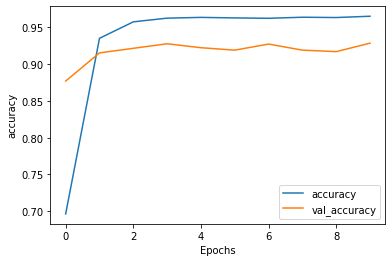

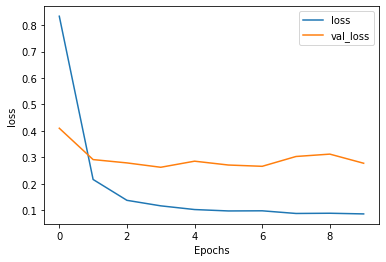

In [19]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")